# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#couldn't get this to work so I just installed it in my terminal 

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"
count = 0


for i in range(len(cities)):
    try:
        count += 1
        city = cities[i]
        query_url = url + "&q=" + city + "&appid=" + weather_api_key 
        weather_response = requests.get(query_url).json()
        description = weather_response['weather'][0]['description']
        print(f"{count}: {cities[i]} - weather check - {description}")
        
    except:
        print(f"{count}: {cities[i]} not found")




1: rikitea - weather check - clear sky
2: ushuaia - weather check - broken clouds
3: yellowknife - weather check - broken clouds
4: aflu not found
5: temaraia not found
6: guaira - weather check - light rain
7: kavieng - weather check - moderate rain
8: hilo - weather check - few clouds
9: henzada not found
10: khatanga - weather check - clear sky
11: avarua - weather check - overcast clouds
12: sokoni - weather check - broken clouds
13: telemaco borba - weather check - overcast clouds
14: iguaba grande - weather check - broken clouds
15: busselton - weather check - clear sky
16: nikolskoye - weather check - mist
17: snezhnogorsk - weather check - clear sky
18: grand river south east not found
19: arraial do cabo - weather check - broken clouds
20: sangueya - weather check - clear sky
21: matara - weather check - overcast clouds
22: warrnambool - weather check - clear sky
23: salalah - weather check - clear sky
24: barrow - weather check - broken clouds
25: nishihara - weather check - 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
cities_data = {"City":cities}
cities_data_df = pd.DataFrame(cities_data)
count = 0

cities_data_df["Lat"] = ""
cities_data_df["Lng"] = ""
cities_data_df["Max Temp"] = ""
cities_data_df["Humidity"] = ""
cities_data_df["Cloudiness"] = ""
cities_data_df["Wind Speed"] = ""
cities_data_df["Date"] = ""

for index, row in cities_data_df.iterrows():
    
    try:
        city = cities[index]
        count += 1
        query_url = url + "&q=" + city + "&appid=" + weather_api_key 
        weather_response = requests.get(query_url).json()
        cities_data_df.loc[index, 'Lat'] = weather_response['coord']['lat']
        cities_data_df.loc[index, 'Lng'] = weather_response['coord']['lon']
        cities_data_df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        cities_data_df.loc[index, 'Humidity'] = float(weather_response['main']['humidity'])
        cities_data_df.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        cities_data_df.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        cities_data_df.loc[index, 'Date'] = weather_response['dt']
        print(f"{count} : processed - {city} " )
        
    except:
        print(f"{count} : {city} not found" )
        pass
    
        

cities_data_df.head()


1 : processed - rikitea 
2 : processed - ushuaia 
3 : processed - yellowknife 
4 : aflu not found
5 : temaraia not found
6 : processed - guaira 
7 : processed - kavieng 
8 : processed - hilo 
9 : henzada not found
10 : processed - khatanga 
11 : processed - avarua 
12 : processed - sokoni 
13 : processed - telemaco borba 
14 : processed - iguaba grande 
15 : processed - busselton 
16 : processed - nikolskoye 
17 : processed - snezhnogorsk 
18 : grand river south east not found
19 : processed - arraial do cabo 
20 : processed - sangueya 
21 : processed - matara 
22 : processed - warrnambool 
23 : processed - salalah 
24 : processed - barrow 
25 : processed - nishihara 
26 : processed - waingapu 
27 : processed - qaanaaq 
28 : processed - la ronge 
29 : taolanaro not found
30 : processed - gashua 
31 : processed - necochea 
32 : processed - cherskiy 
33 : attawapiskat not found
34 : processed - luderitz 
35 : processed - viru 
36 : processed - najran 
37 : processed - grand gaube 
38 : p

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,-23.12,-134.97,24.36,68,0,3.51,1604088628
1,ushuaia,-54.8,-68.3,9,70,75,10.3,1604088519
2,yellowknife,62.46,-114.35,-7,85,75,4.1,1604088419
3,aflu,,,,,,,
4,temaraia,,,,,,,


In [11]:
cities_data_df.to_csv(path_or_buf="../output_data/cities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#cities_data_df.loc[cities_data_df["Humidity"]>100]

cities_data_df["Humidity"] = cities_data_df["Humidity"].replace('',0, regex=True).astype(float)

cities_data_df.loc[cities_data_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

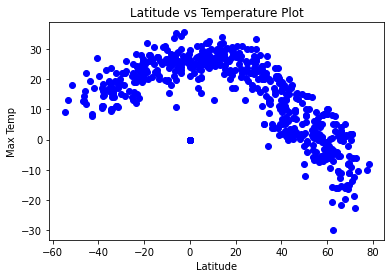

In [31]:
lat = cities_data_df["Lat"].replace('',0, regex=True).astype(float)
lng = cities_data_df["Lng"].replace('',0, regex=True).astype(float)
temp = cities_data_df["Max Temp"].replace('',0, regex=True).astype(float)


plt.title("Latitude vs Temperature Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(lat, temp, marker="o", color="blue")



## Latitude vs. Humidity Plot

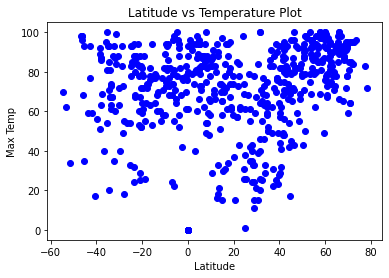

In [32]:
humidity = cities_data_df["Humidity"]

plt.title("Latitude vs Humidity Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(lat, humidity, marker="o", color="blue")

## Latitude vs. Cloudiness Plot

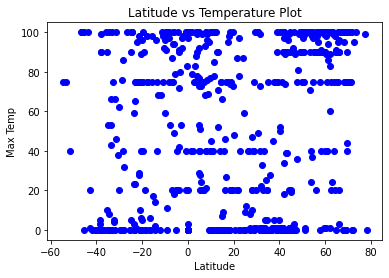

In [33]:
cloudiness = cities_data_df["Cloudiness"].replace('',0, regex=True).astype(float)

plt.title("Latitude vs Cloudiness Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(lat, cloudiness, marker="o", color="blue")


## Latitude vs. Wind Speed Plot

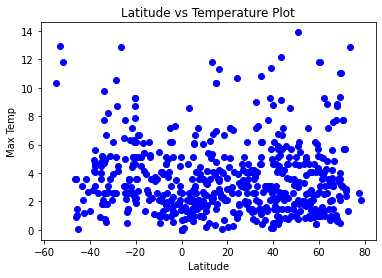

In [35]:
wind_speed = cities_data_df["Wind Speed"].replace('',0, regex=True).astype(float)

plt.title("Latitude vs Wind Speed Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(lat, wind_speed, marker="o", color="blue")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

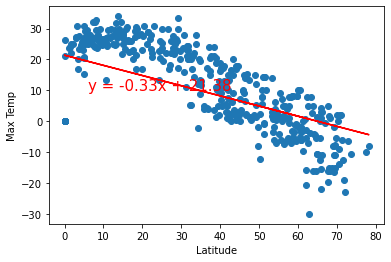

In [51]:
cities_data_df["Lat"] = lat

north_hem = cities_data_df.loc[cities_data_df["Lat"] >= 0 ]
 
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

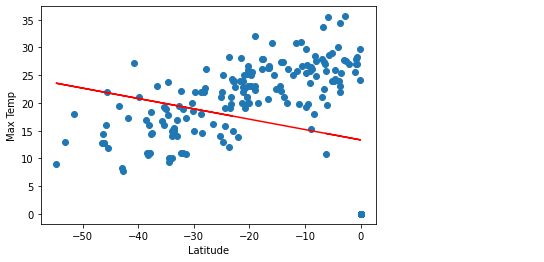

In [52]:
south_hem = cities_data_df.loc[cities_data_df["Lat"] <= 0 ]
 
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

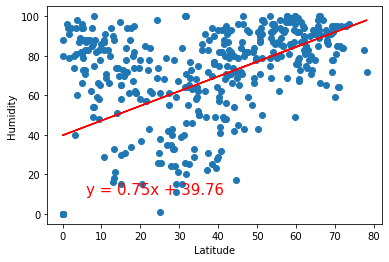

In [50]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

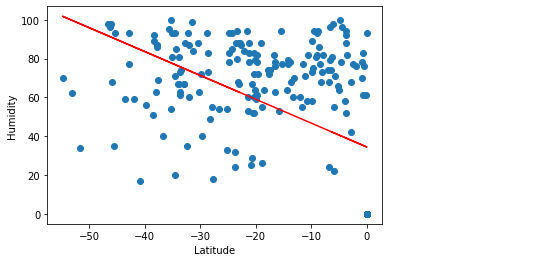

In [53]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

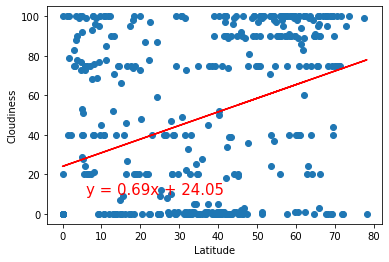

In [48]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

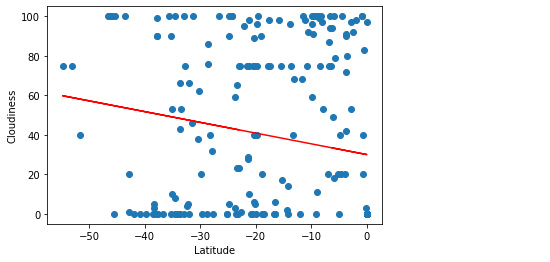

In [54]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

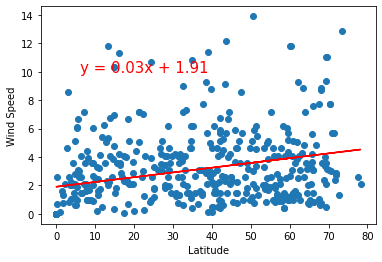

In [47]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

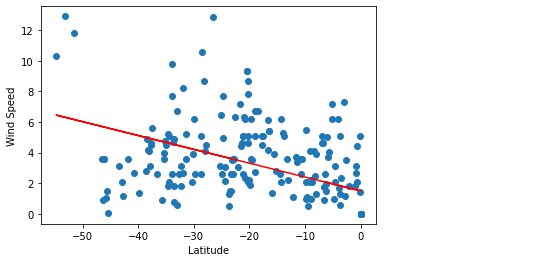

In [55]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"].replace('',0, regex=True).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()